In [47]:
import cmapPy.pandasGEXpress.parse_gct
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
file=cmapPy.pandasGEXpress.parse_gct.parse(r"C:\Users\ASUS\Downloads\PAAD.gct")

In [35]:
data=file.data_df
#row=file.row_metadata_df
column=file.col_metadata_df.T

In [36]:
df=pd.concat([column,data]).T

In [37]:
y0=df["histological_type"]
y1=df["histological_type_other"]

In [38]:
X0=df.iloc[:,124:]

In [39]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
X1=imputer.fit_transform(X0)

In [40]:
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(X1)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1)

In [42]:
l=[i for i in range(183)]
y0.index=l
y1.index=l

In [43]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf=pd.concat([principalDf,y1],axis=1) 
finalDf["histological_type_other"].fillna("adenocarcinoma",inplace=True)

In [44]:
finalDf.replace("invasive adenocarcinoma","adenocarcinoma",inplace=True)
finalDf.replace("invasive, well-differentiated","adenocarcinoma",inplace=True)
finalDf.replace("poorly differentiated adenocarcinoma","adenocarcinoma",inplace=True)
finalDf.replace("neuroendocrine carcinoma nos","neuroendocrine",inplace=True)
finalDf.replace("82463 neuroendocrine carcinoma nos","neuroendocrine",inplace=True)
finalDf.replace("neuroendocrine carcinoma","neuroendocrine",inplace=True)
finalDf.replace("adenocarcinoma, nos","adenocarcinoma",inplace=True)
finalDf.replace("poorly differentiated pancreatic adenocarcinoma","adenocarcinoma",inplace=True)
finalDf.replace("not specified","adenocarcinoma",inplace=True)
finalDf.replace("intraductal tubulopapillary neoplasm","adenocarcinoma",inplace=True)
finalDf.replace("adenocarcinoma- nos","adenocarcinoma",inplace=True)
finalDf.replace("ductal and micropapillary","adenocarcinoma",inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder
lb0=LabelEncoder()
finalDf["histological_type_other"]=lb0.fit_transform(finalDf["histological_type_other"].astype(str))
y=finalDf["histological_type_other"]

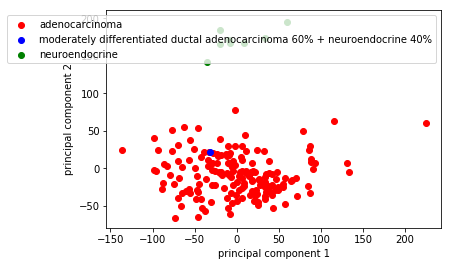

In [46]:
plt.scatter(principalDf["principal component 1"][y==0],principalDf["principal component 2"][y==0],label="adenocarcinoma",color="r")
plt.scatter(principalDf["principal component 1"][y==1],principalDf["principal component 2"][y==1],label='moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%',color="b")
plt.scatter(principalDf["principal component 1"][y==2],principalDf["principal component 2"][y==2],label="neuroendocrine",color="g")
plt.legend(loc="best")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

In [52]:
import cmapPy.pandasGEXpress.parse_gct
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file=cmapPy.pandasGEXpress.parse_gct.parse(r"C:\Users\ASUS\Downloads\PAAD.gct")

data=file.data_df
#row=file.row_metadata_df
column=file.col_metadata_df.T
df=pd.concat([column,data]).T



df.drop(df[df["histological_type_other"]=="neuroendocrine carcinoma"].index,inplace=True)

df.drop(df[df["histological_type_other"]=="neuroendocrine carcinoma nos"].index,inplace=True)

df.drop(df[df["histological_type_other"]=="neuroendocrine"].index,inplace=True)

df.drop(df[df["histological_type_other"]=="82463 neuroendocrine carcinoma nos"].index,inplace=True) 

##The Data frame with neuroendocrine type cancer removed is df
df

,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66,NaN,NaN,yes,...,8.6,6.2,9,9.9,NaN,9.2,12.9,10.1,9.3,5.5
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729,NaN,yes,...,8.8,5.8,8.5,10,NaN,9.3,12.4,9.8,8.9,4.5
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293,NaN,NaN,yes,...,9.1,3.9,8.1,10,-0.8,9.4,13.5,9.8,9.2,4.7
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80,NaN,yes,...,8.9,5.2,8.5,9.7,1.9,9.4,12.5,9.7,9.3,6.4
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627,NaN,NaN,yes,...,8.4,5.9,8.6,9.9,0.1,9.3,13,10.1,9.2,4.9
aaba-Primary solid Tumor,aaba,Primary solid Tumor,3,tcga-2j-aaba,e3a19e63-bae5-498b-9687-41194aa5728d,dead,607,NaN,NaN,yes,...,7.5,5.7,8.2,10.6,0.3,9.9,12.2,10.4,9.6,5
aabe-Primary solid Tumor,aabe,Primary solid Tumor,3,tcga-2j-aabe,58c1c391-5ea3-4432-bb1e-e7e1974954bc,alive,NaN,676,NaN,yes,...,7.9,5.8,8.8,10.1,-0.7,9.1,12.9,9.7,8.9,5.6
aabf-Primary solid Tumor,aabf,Primary solid Tumor,2,tcga-2j-aabf,886d6116-d496-444f-9b7b-7449dad31055,dead,691,NaN,NaN,yes,...,9,5.8,8.7,9.9,0.1,9.5,12.6,10.6,9.8,5.1
aabh-Primary solid Tumor,aabh,Primary solid Tumor,2,tcga-2j-aabh,c53328b4-0930-4e6a-a648-283b5565295e,alive,NaN,1287,NaN,yes,...,8.6,6.4,9.4,9.8,-1.2,8.9,12.7,10,8.8,4.6


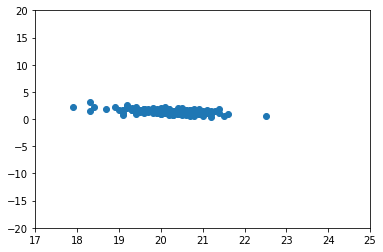

In [54]:
#Plot Gene Expression
dfnew=df[["participant_id","IFNAR1","IFNAR2"]]   
A=dfnew["IFNAR1"]+dfnew["IFNAR2"] 
M=dfnew["IFNAR1"]-dfnew["IFNAR2"]   

plt.axis([17,25,-20,20])                                
plt.scatter(A,M)
plt.show()                                                    